{'data_root': '/home/data',
 'deepmatch': '/home/deepmatching_1.2.2_c++/deepmatching-static'}

MOT16.02
	Result: 0.63082530591
	Info: {'FN': 1077, 'FP': 341, 'IDSW': 0, 'GT': 3841}


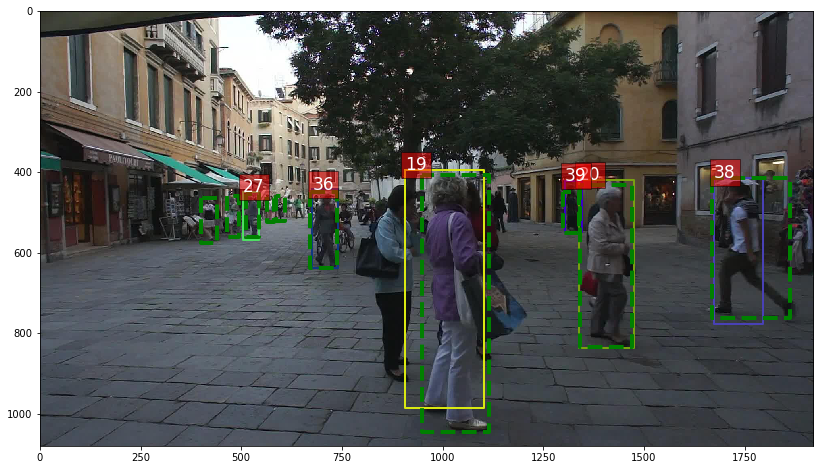

In [1]:
%matplotlib inline
import json
from pppr import aabb
from pprint import pprint
Settings = json.load(open('settings.txt'))
pprint(Settings)
import sys
sys.path.insert(0,'../')
from pak.datasets.MOT import MOT16
from pak import utils
import matplotlib.pyplot as plt
import numpy as np
from pak.evaluation import MOTA

root = Settings['data_root']

from experiments import MOT16_Experiments

mot16 = MOT16_Experiments(root)

fig = plt.figure(figsize=(16,8))

mot16.plot_frame_MOT16_02(fig.add_subplot(111), 266, with_gt=True)

print("")
print("MOT16.02")

Gt = mot16.get_MOT16_02_gt_trajectories()
Hy = mot16.get_MOT16_02_trajectories()
threshold = 0.5

result, info = MOTA.evaluate_aabb(Gt, Hy, threshold, info=True)

print("\tResult:", result)
print("\tInfo:", info)

plt.show()

MOT16.11
	Result: 0.690595611285
	Info: {'FN': 414, 'FP': 573, 'IDSW': 0, 'GT': 3190}


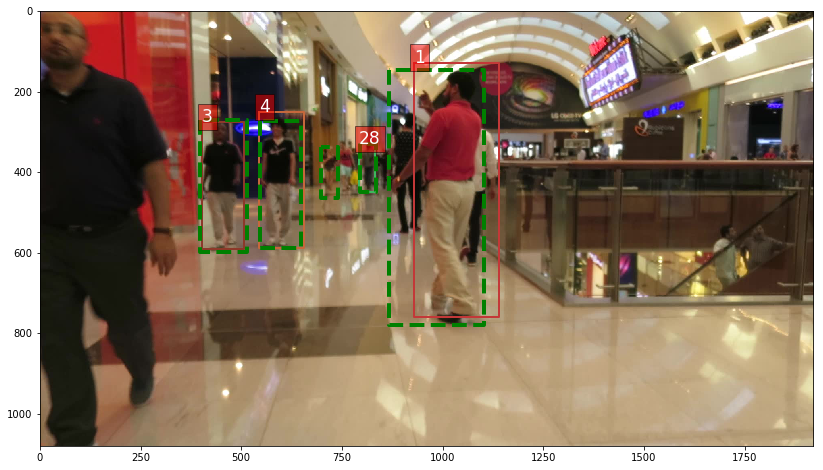

In [2]:
fig = plt.figure(figsize=(16,8))

print("MOT16.11")

Gt = mot16.get_MOT16_11_gt_trajectories()
Hy = mot16.get_MOT16_11_trajectories()
threshold = 0.5

result, info = MOTA.evaluate_aabb(Gt, Hy, threshold, info=True)

print("\tResult:", result)
print("\tInfo:", info)

mot16.plot_frame_MOT16_11(fig.add_subplot(111), 1, with_gt=True)